# Modules

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from pprint import pprint
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Function

# Data

In [22]:
# Get historical Data
df = yf.download(tickers='BBRI.JK',
                 period='2000d',
                 interval='1d')

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,4850.0,4870.0,4790.0,4800.0,4800.0,218278000
2024-07-08,4800.0,4830.0,4740.0,4750.0,4750.0,222042100
2024-07-09,4780.0,4930.0,4750.0,4870.0,4870.0,291320400
2024-07-10,4870.0,4920.0,4840.0,4850.0,4850.0,167619700
2024-07-11,4910.0,4920.0,4840.0,4840.0,4840.0,170461300
2024-07-12,4970.0,4980.0,4880.0,4900.0,4900.0,301125400
2024-07-15,4920.0,4930.0,4810.0,4820.0,4820.0,188713000
2024-07-16,4820.0,4840.0,4730.0,4730.0,4730.0,189271400
2024-07-17,4750.0,4810.0,4720.0,4760.0,4760.0,263325400


In [23]:
df = df.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)
df.reset_index(inplace=True)
df.tail(10)

,Date,Close
1990,2024-07-05,4800.0
1991,2024-07-08,4750.0
1992,2024-07-09,4870.0
1993,2024-07-10,4850.0
1994,2024-07-11,4840.0
1995,2024-07-12,4900.0
1996,2024-07-15,4820.0
1997,2024-07-16,4730.0
1998,2024-07-17,4760.0
1999,2024-07-18,4890.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2000 non-null   datetime64[ns]
 1   Close   2000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.4 KB


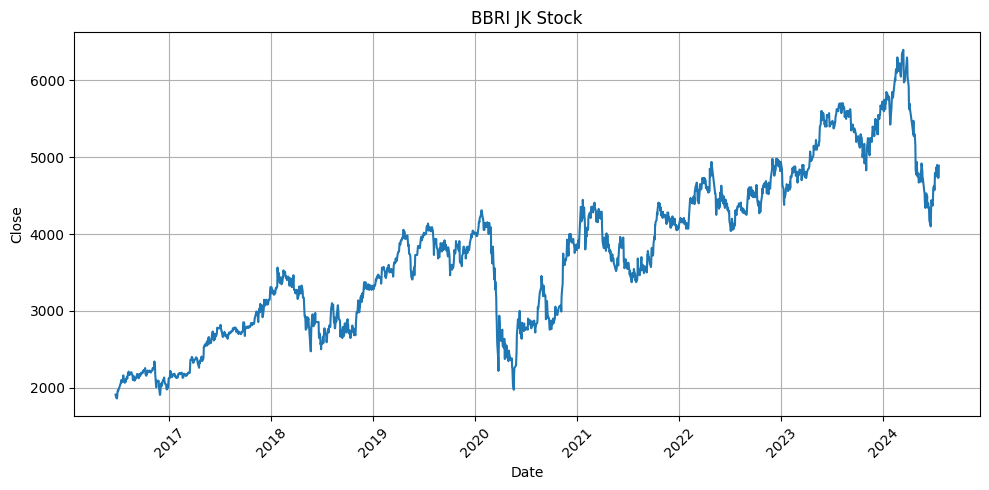

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'],  linestyle='-')
plt.title("BBRI JK Stock")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stationarity Test

Sebelum membangun model ARIMA, hal yang perlu dilakukan adalah melakukan uji statisoneritas dalam rata-rata dan varians. Uji stasioneritas dapat dilakukan dengan melihat nilai BoxCox lambda, jika nilai lambda jauh dari satu maka kita perlu lakukan transformasi

In [64]:
from scipy.stats import boxcox_normmax
lambda_value = boxcox_normmax(df.Close)
lambda_value

0.5130837127960097

In [65]:
#Transformed
transformed_data = df.Close ** lambda_value
lambda_value1 = boxcox_normmax(transformed_data)
print (lambda_value1)

0.9999999481272748


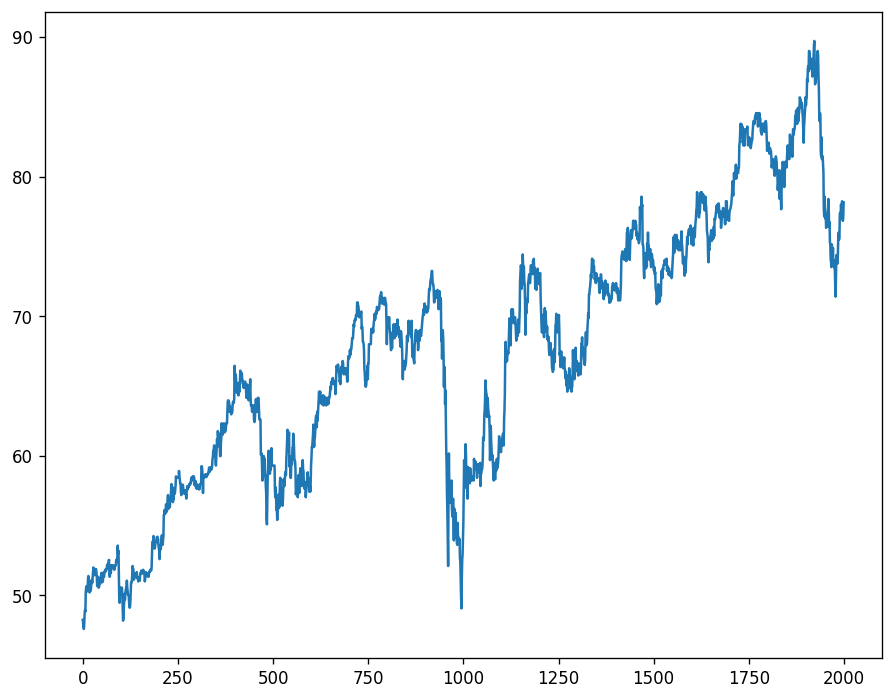

In [66]:
plt.plot(transformed_data)

Nilai lambda sudah mendekati satu setelah dilakukan transformasi, maka selanjutnya kita bisa lakukan pengujian stasionerotas dalam rata-rata

## Stationarity on Mean

Pengujian stasionerotas dala varians menggunakan ADF Test

In [67]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(transformed_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.918668
p-value: 0.323331


Data belum stastioner dalam rata-rata karena nilai p-value > 0.05 maka perlu dilakukan differencing

In [77]:

diff_data = transformed_data.diff().dropna()
result = adfuller(diff_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -23.117352
p-value: 0.000000


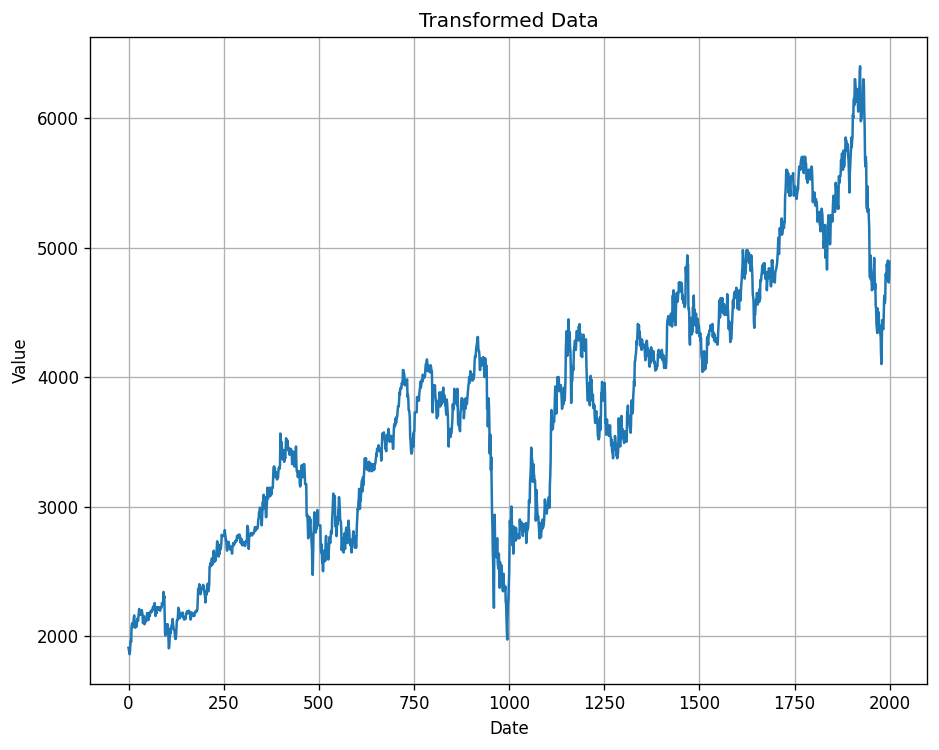

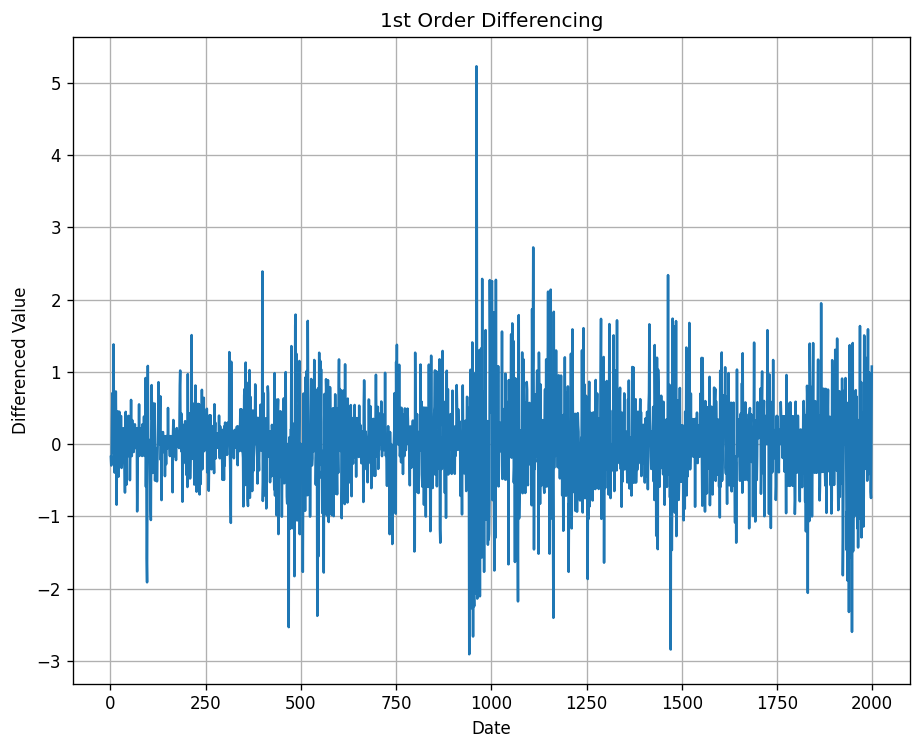

In [96]:
# Plot pertama untuk Transformed Data
plt.figure()
plt.plot(df.Close)
plt.title('Transformed Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()

# Plot kedua untuk 1st Order Differencing
plt.figure()
plt.plot(diff_data)
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid()
plt.show()

# ARIMA Model

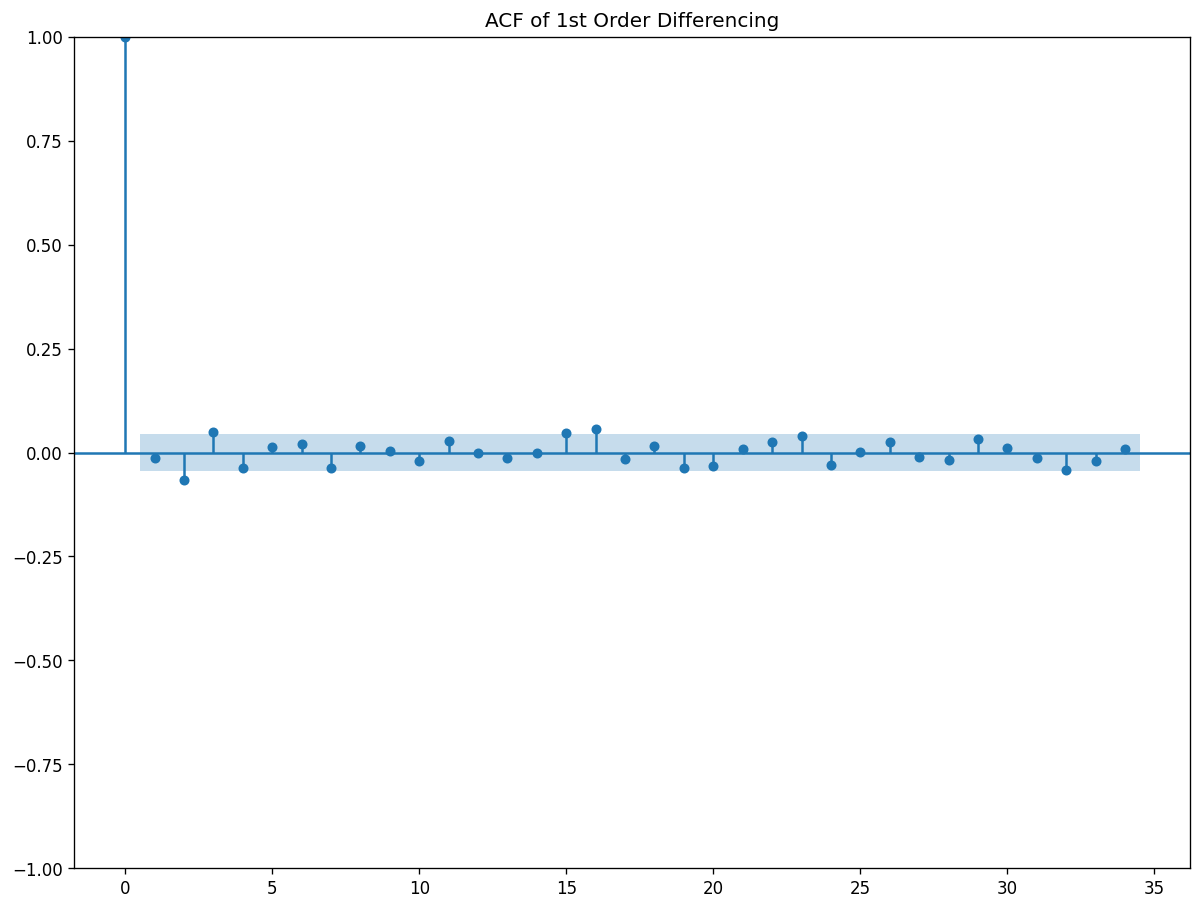

In [102]:
# AR (p)
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
fig, axes = plt.subplots(1, 1, sharex=True)
plot_pacf(diff_data, ax=axes)
axes.set_title('PACF of 1st Order Differencing')

plt.show()

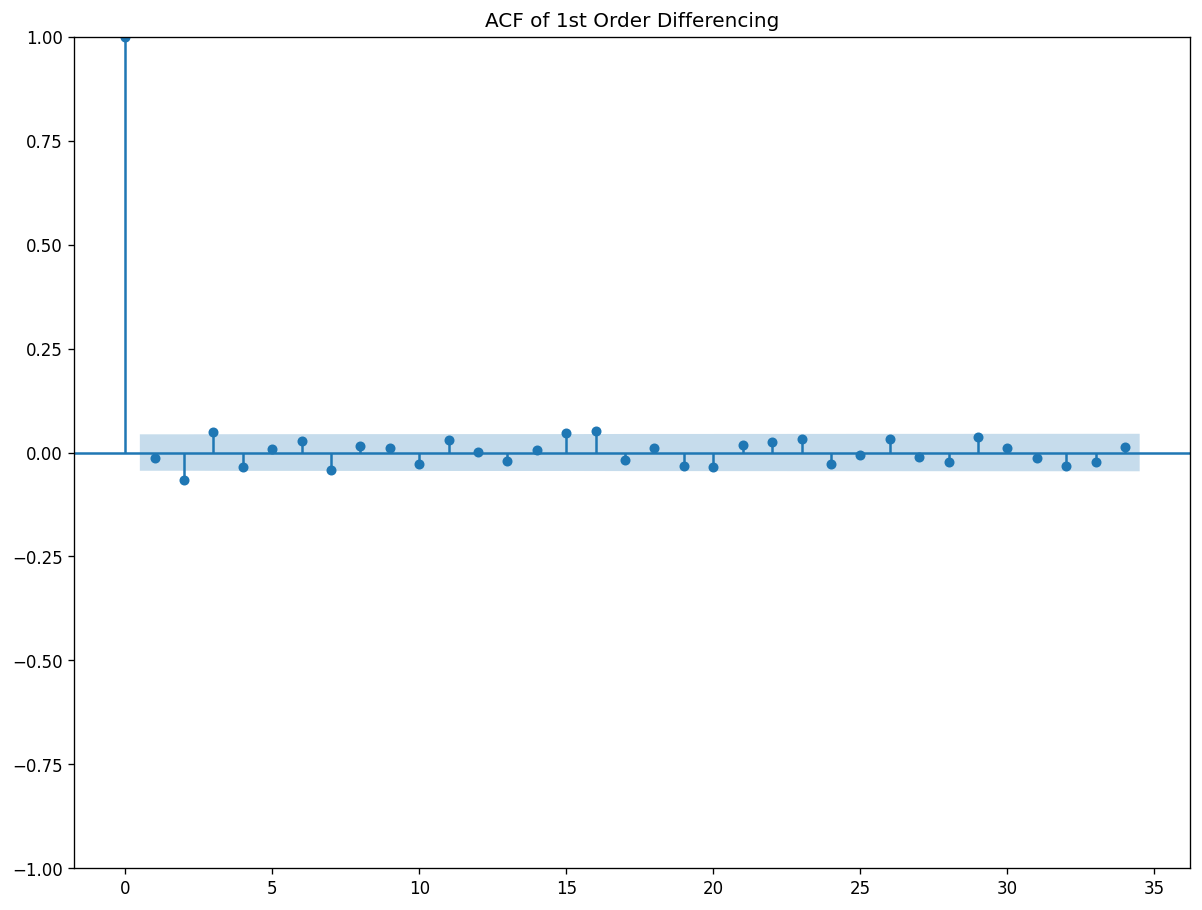

In [103]:
# AR (q)
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
fig, axes = plt.subplots(1, 1, sharex=True)
plot_acf(diff_data, ax=axes)
axes.set_title('ACF of 1st Order Differencing')

plt.show()

In [112]:
from statsmodels.tsa.arima_model import ARIMA

# Define the ARIMA model
def fit_arima_model(df, order):
    model = ARIMA(df['Close'], order=order)
    model_fit = model.fit()
    return model_fit

# Fit ARIMA model (example with order (1, 1, 1))
arima_order = (1, 1, 1)
arima_model_fit = fit_arima_model(df, arima_order)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
